In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
path = os.getcwd()
path

'/Users/Wayne/Desktop/Advanced-AI-Course_Assignment/Assignment 3'

In [3]:
data = pd.read_csv(f"{path}/Hotels_Sales.csv")
data.head()

,Week,Hotel,2016,2017,2018,2019,2020
0,1,21,"$497,433","$470,224","$499,591","$475,774","$514,058"
1,1,22,"$507,554","$511,698","$504,512","$568,714","$573,596"
2,1,23,"$756,729","$743,345","$728,017","$648,909","$648,779"
3,1,24,"$715,910","$684,969","$618,252","$647,173","$710,796"
4,1,25,"$1,158,284","$1,153,588","$1,145,525","$1,285,172","$1,389,244"


In [4]:
data["Hotel"].unique()

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 59])

In [5]:
data[data["Hotel"] == 59]

,Week,Hotel,2016,2017,2018,2019,2020
10,1,59,"$375,196","$371,500","$355,009","$359,469","$374,665"
21,2,59,"$355,897","$364,836","$373,043","$336,194","$364,613"
32,3,59,"$337,961","$369,250","$356,722","$343,227","$356,311"
43,4,59,"$362,579","$376,974","$383,904","$356,901","$379,030"
54,5,59,"$339,167","$395,627","$389,836","$362,601","$384,428"
65,6,59,"$345,329","$365,375","$396,962","$392,625","$410,342"
76,7,59,"$374,084","$394,411","$419,347","$428,773","$413,344"
87,8,59,"$340,063","$424,192","$376,429","$435,282","$351,975"
98,9,59,"$448,747","$433,295","$437,907","$417,782","$346,356"
109,10,59,"$416,171","$433,708","$412,575","$431,429","$303,074"


# EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Week    143 non-null    int64 
 1   Hotel   143 non-null    int64 
 2   2016    143 non-null    object
 3   2017    143 non-null    object
 4   2018    143 non-null    object
 5   2019    143 non-null    object
 6   2020    143 non-null    object
dtypes: int64(2), object(5)
memory usage: 7.9+ KB


In [7]:
# Clean the data (transform sales amount from str to float)
for year in range(2016, 2021):
    data[str(year)] = (
        data[str(year)]
        .replace('[\$,]', '', regex=True)
        .astype(float)
    )

In [8]:
data.describe()

,Week,Hotel,2016,2017,2018,2019,2020
count,143.000000,143.000000,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02
mean,7.000000,28.545455,8.301284e+05,8.448457e+05,8.816152e+05,8.763054e+05,8.351528e+05
std,3.754809,10.047582,4.103057e+05,4.308803e+05,4.914012e+05,4.632868e+05,4.581824e+05
min,1.000000,21.000000,3.379610e+05,3.556430e+05,3.550090e+05,3.361940e+05,3.030740e+05
25%,4.000000,23.000000,5.157410e+05,5.290675e+05,5.668815e+05,5.644920e+05,5.374505e+05
50%,7.000000,26.000000,7.328330e+05,7.058660e+05,7.378300e+05,7.318870e+05,6.834110e+05
75%,10.000000,29.000000,1.005840e+06,1.011418e+06,9.768995e+05,9.338970e+05,9.766090e+05
max,13.000000,59.000000,2.349408e+06,2.586202e+06,3.671528e+06,2.661885e+06,3.074330e+06


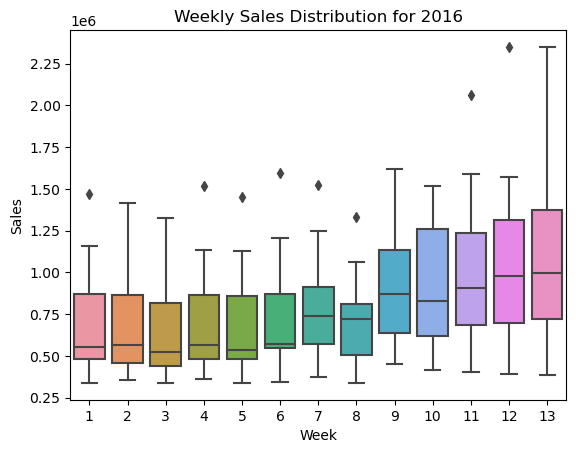

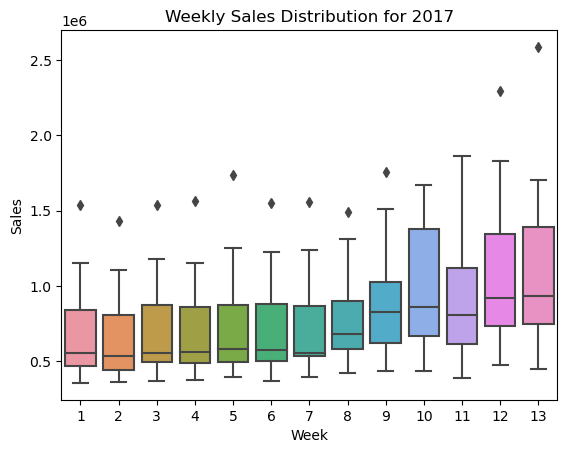

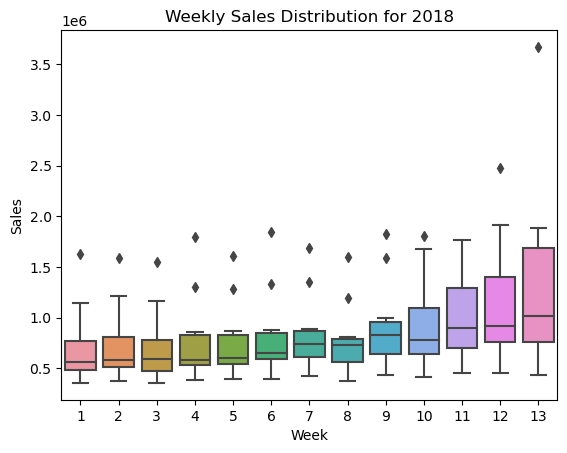

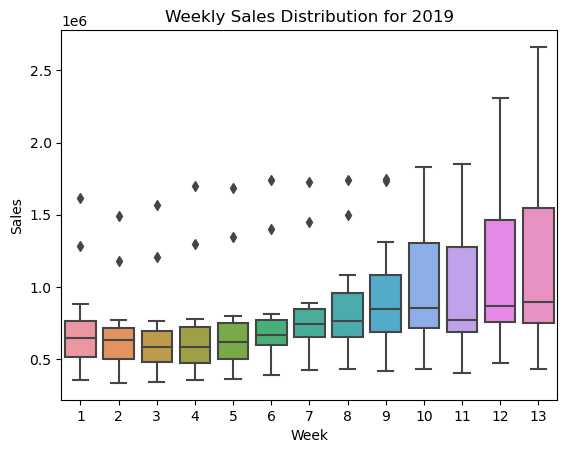

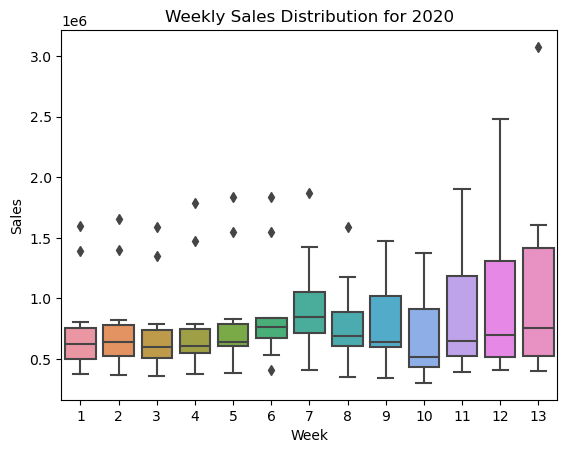

In [9]:
# Seasonality Check
for i in range(2016, 2021):
    seasonal_plot = sns.boxplot(data=data, x='Week', y=f'{i}')
    seasonal_plot.set_title(f'Weekly Sales Distribution for {i}')
    seasonal_plot.set_xlabel('Week')
    seasonal_plot.set_ylabel('Sales')
    plt.show()

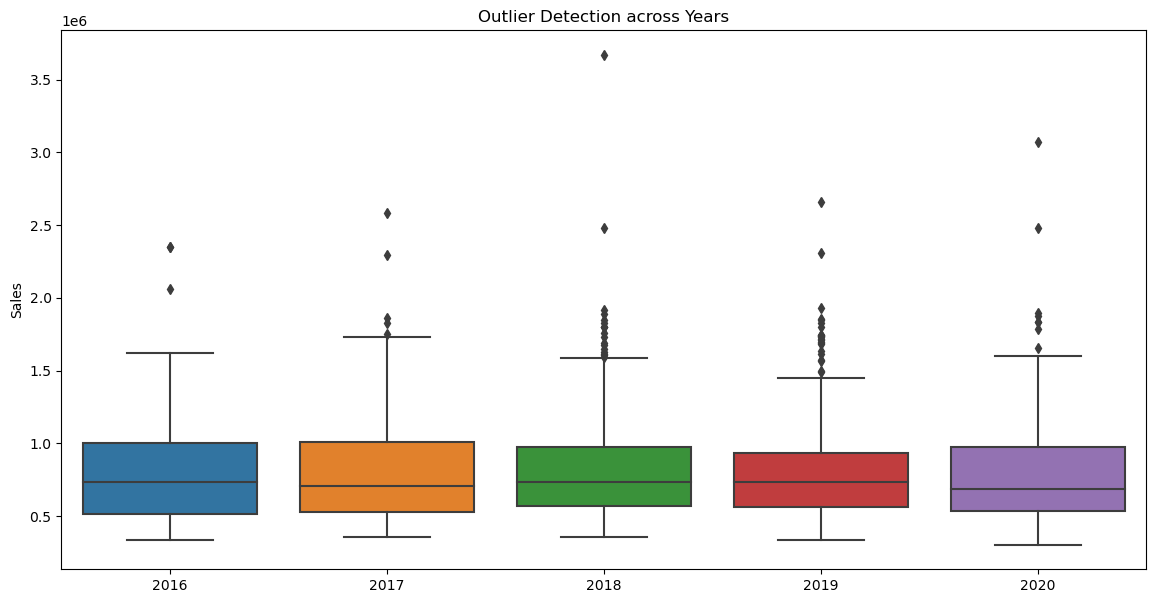

In [10]:
# Outlier Detection
plt.figure(figsize=(14, 7))
sns.boxplot(data=data.drop(columns=['Week', 'Hotel']))
plt.title('Outlier Detection across Years')
plt.ylabel('Sales')
plt.show()

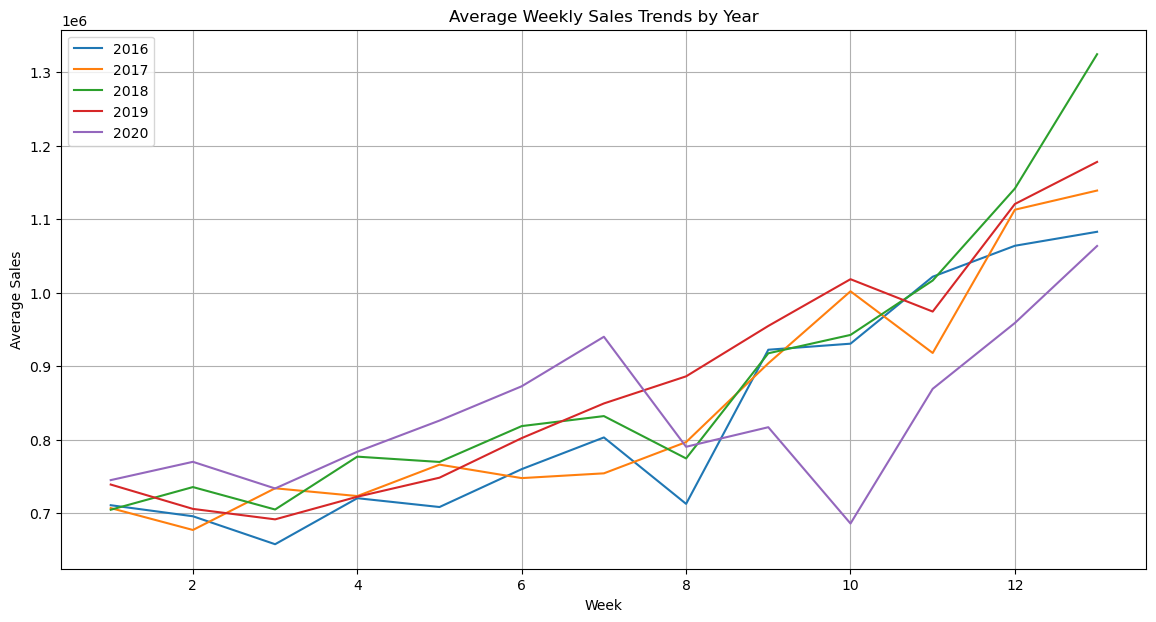

In [11]:
# Trend Analysis
plt.figure(figsize=(14, 7))
for year in range(2016, 2021):
    annual_trend = data.groupby('Week')[str(year)].mean()
    plt.plot(annual_trend, label=str(year))
plt.title('Average Weekly Sales Trends by Year')
plt.xlabel('Week')
plt.ylabel('Average Sales')
plt.legend()
plt.grid(True)
plt.show()

**2020 Week 8-12 weeks has impact from pandemic, should be replace by the mean value of the other year in the same week **

In [12]:
pandemic_weeks = [8, 9, 10, 11, 12, 13]
mean_sales = data[data['Week'].isin(pandemic_weeks)].groupby(['Hotel', 'Week'])[['2016', '2017', '2018', '2019']].mean().mean(axis=1)

# Assign the mean to the 2020 column for affected weeks using items() instead of iteritems()
for index, mean_value in mean_sales.items():
    hotel, week = index
    data.loc[(data['Hotel'] == hotel) & (data['Week'] == week), '2020'] = mean_value

In [13]:
columns = ['Week_{}_{}'.format(year, week) for year in range(2016, 2021) for week in range(1, 14)]
reshaped_df = pd.DataFrame(columns=columns)

# Iterate over each unique hotel
for hotel in data['Hotel'].unique():
    hotel_data = data[data['Hotel'] == hotel]

    # Flatten the sales data into a single row per hotel
    sales_data = []
    for year in range(2016, 2021):
        for week in range(1, 14):
            weekly_sales = hotel_data[hotel_data['Week'] == week][str(year)].values
            if weekly_sales.size > 0:
                sales_data.append(weekly_sales[0])
            else:
                sales_data.append(None)  # Append None if no data for that week

    # Append this hotel's data to the reshaped DataFrame
    reshaped_df.loc[hotel] = sales_data

# Ensure the index of reshaped_df represents hotel IDs
reshaped_df.index = data['Hotel'].unique()

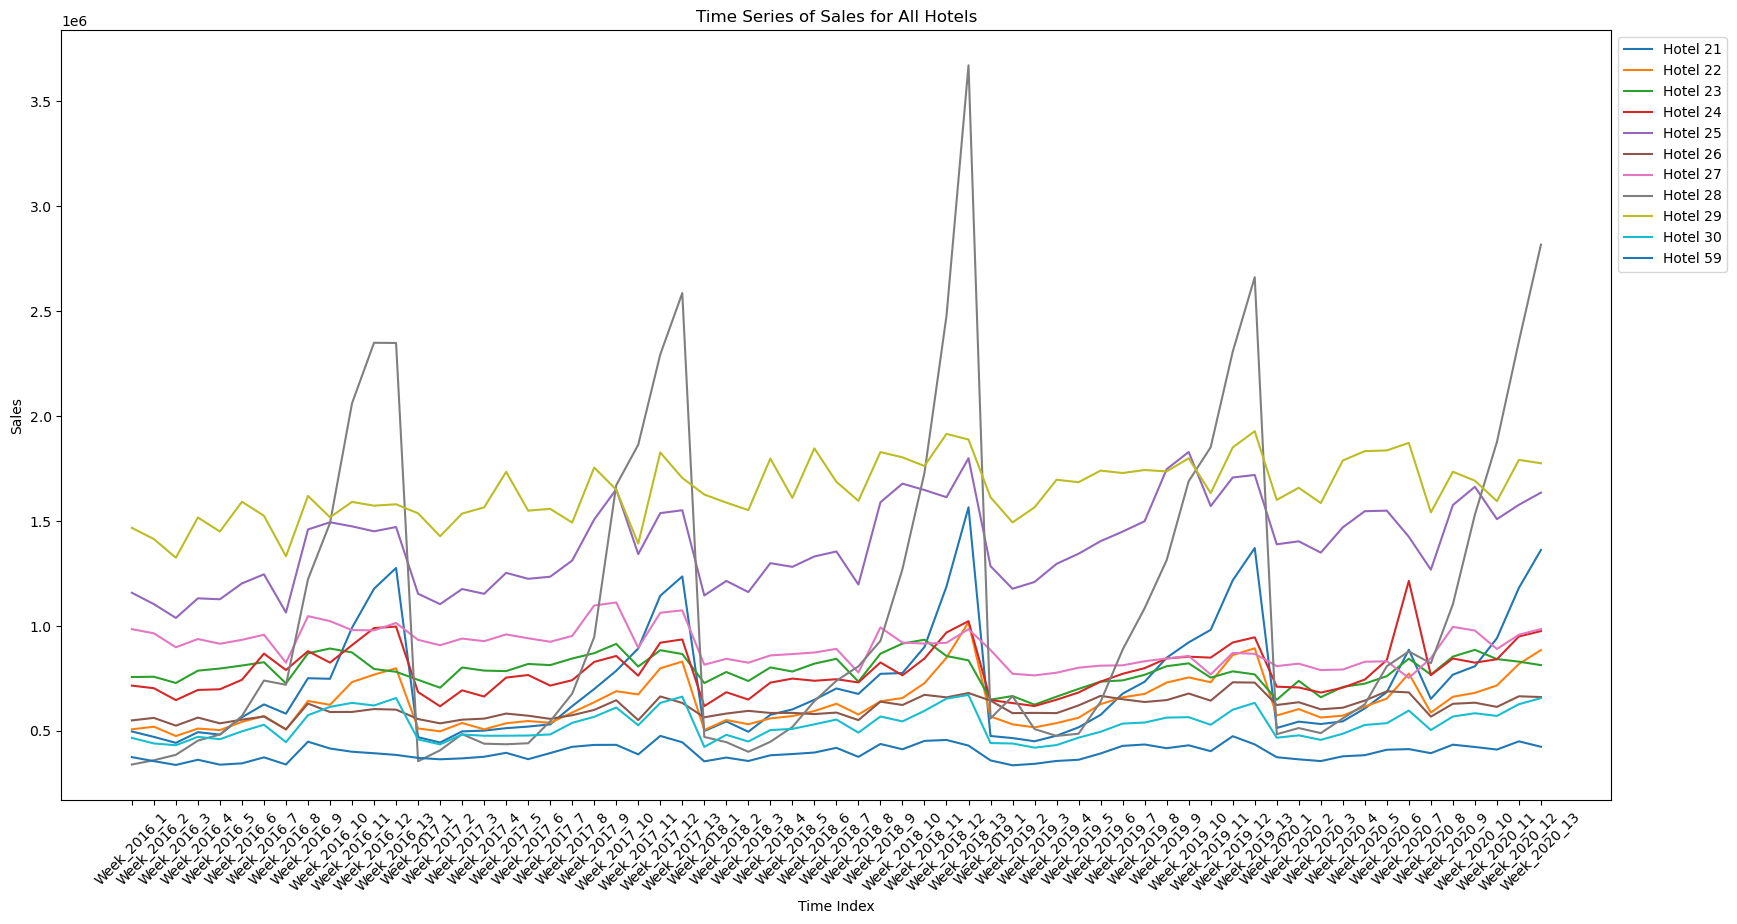

In [14]:
# Ensure a large enough figure size to accommodate the number of lines
plt.figure(figsize=(20, 10))

# Iterate through each hotel in the reshaped DataFrame
for index, row in reshaped_df.iterrows():
    plt.plot(row, label=f'Hotel {index}')

plt.title('Time Series of Sales for All Hotels')
plt.xlabel('Time Index')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place the legend outside of the plot

plt.show()

# Time Series Clustering 

In [15]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

df = reshaped_df.copy()
# Scaling data - important for time series clustering
scaler = TimeSeriesScalerMeanVariance()
scaled_data = scaler.fit_transform(df.values.reshape(df.shape[0], df.shape[1], 1))

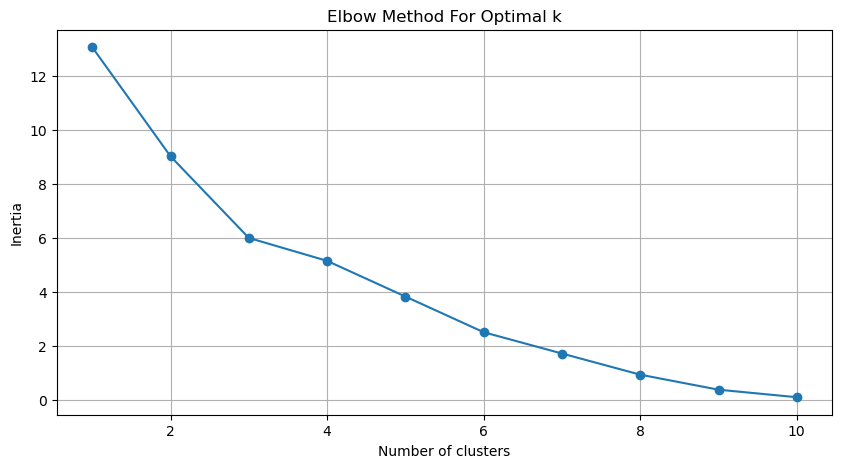

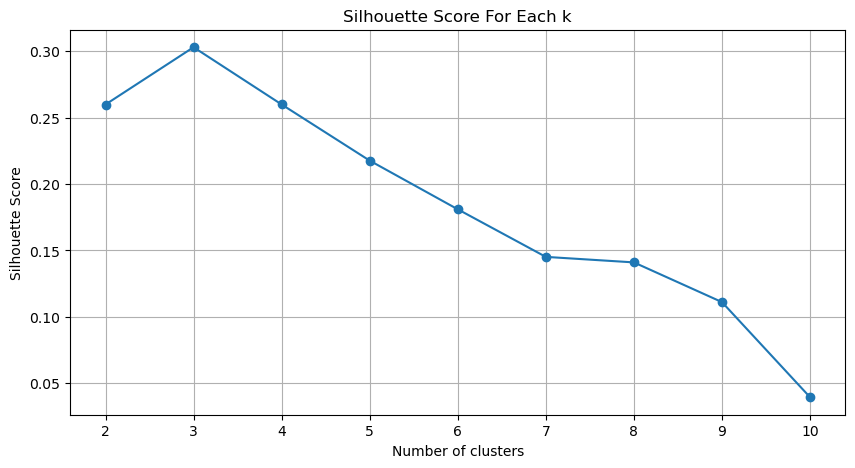

In [16]:
from sklearn.metrics import silhouette_score

# Variables to hold results
inertias = []
sil_scores = []

# Calculate inertia and silhouette scores for each k value
for k in range(1, 11):  # from 1 to 10 clusters
    model = TimeSeriesKMeans(n_clusters=k, metric="dtw", verbose=False, max_iter=10, random_state=32)
    cluster_labels = model.fit_predict(scaled_data)
    inertias.append(model.inertia_)
    
    # Silhouette scores require more than one cluster to be meaningful
    if k > 1:
        # Calculate silhouette score
        sil_score = silhouette_score(scaled_data.reshape(scaled_data.shape[0], -1), cluster_labels.ravel())
        sil_scores.append(sil_score)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Plotting the Silhouette Score graph
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), sil_scores, marker='o')  # start from 2 clusters
plt.title('Silhouette Score For Each k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [17]:
# Clustering
n_clusters = 3
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True, max_iter=10, random_state=42)
labels = model.fit_predict(scaled_data)

# Assign clusters back to the original DataFrame
df['Cluster'] = labels

8.435 --> 5.596 --> 5.596 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

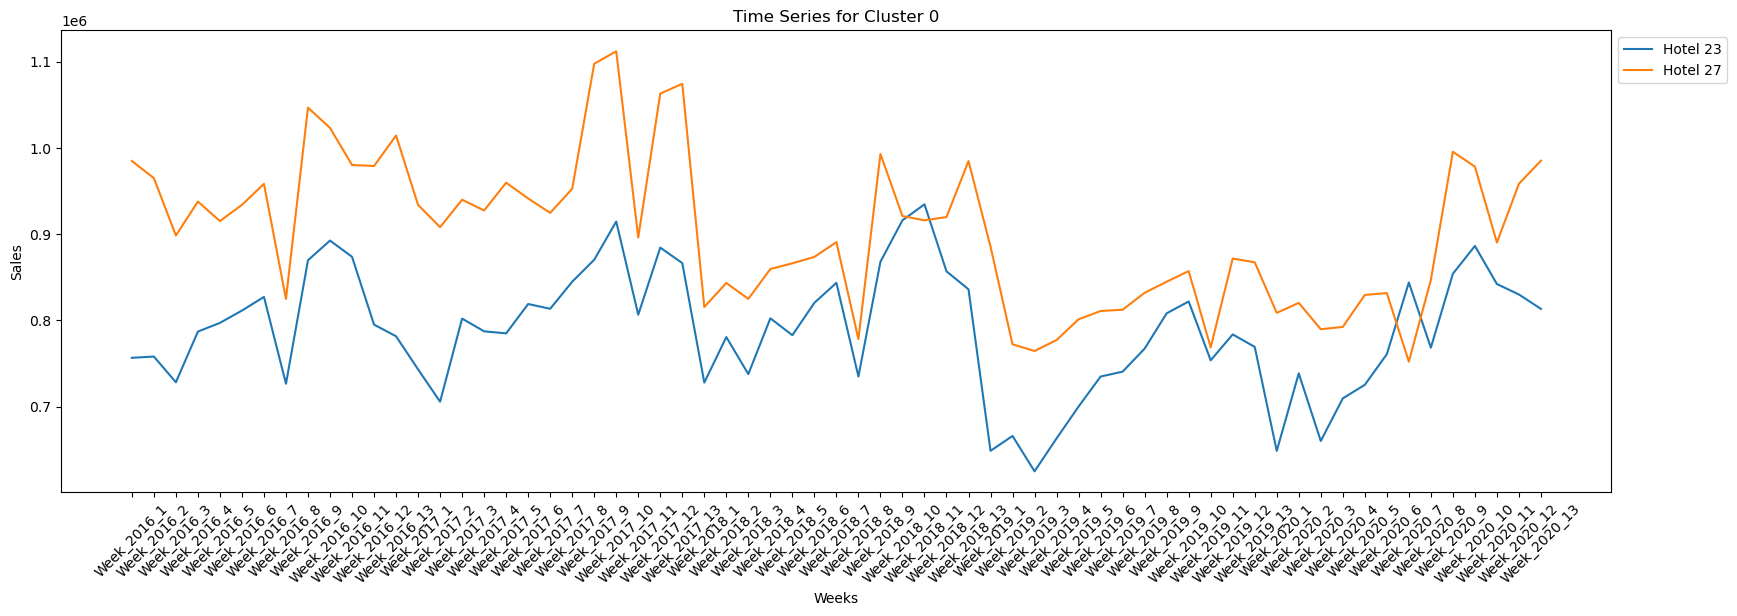

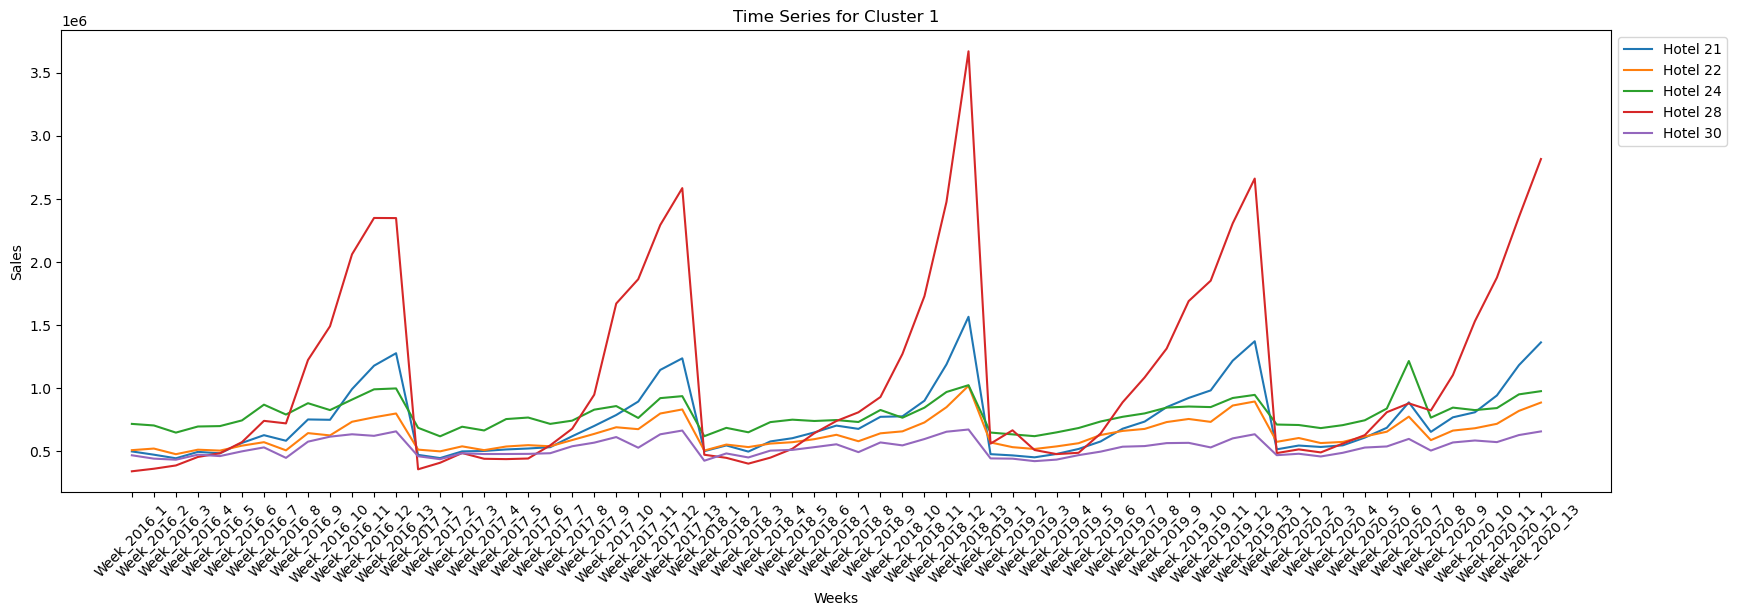

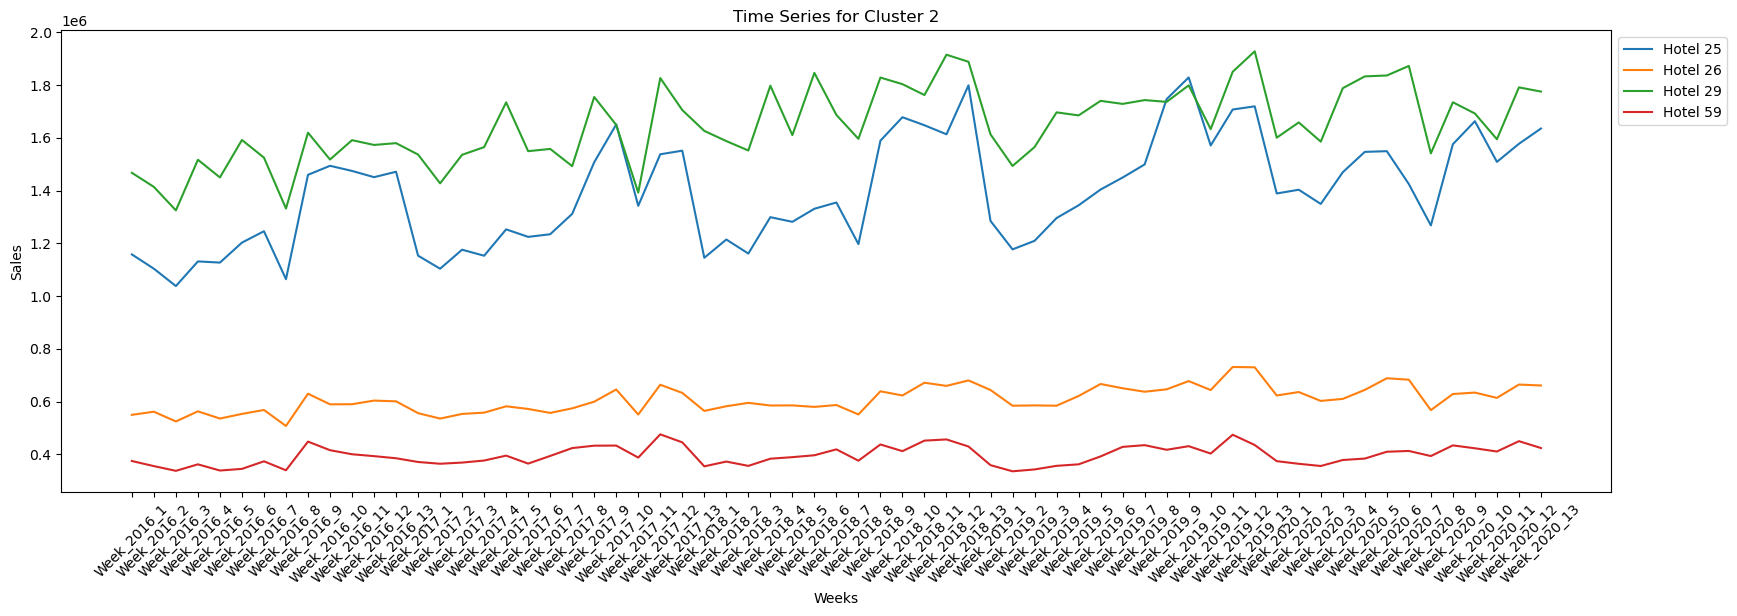

In [18]:
# Create plots for each cluster
for i in range(n_clusters):
    cluster_data = df[df['Cluster'] == i]  # Data for the current cluster
    plt.figure(figsize=(20, 6))  # Set the figure size for better readability
    
    # Plot each hotel's time series in the cluster
    for index, row in cluster_data.iterrows():
        plt.plot(row[:-1], label=f'Hotel {index}')  # Assume the last column is 'Cluster'
    
    plt.title(f'Time Series for Cluster {i}')
    plt.xlabel('Weeks')
    plt.ylabel('Sales')
    plt.xticks(rotation=45)  # Rotate labels to avoid overlap
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend out of the plot
    plt.show()

# Time Series Forecast Model - SARIMAX

Analyzing Cluster 0


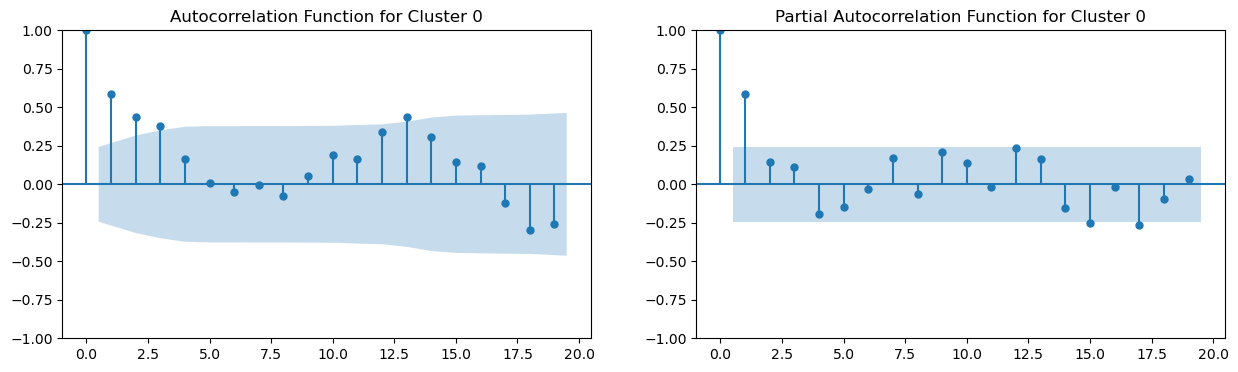

Analyzing Cluster 1


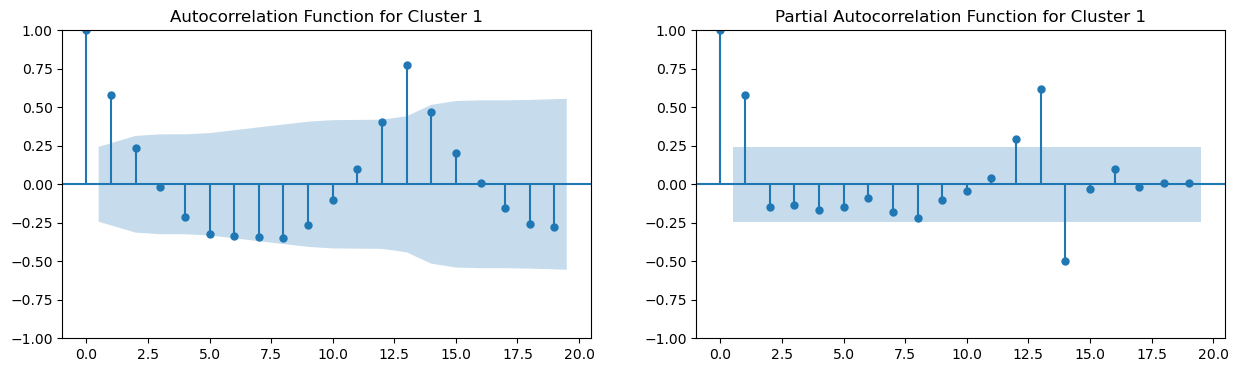

Analyzing Cluster 2


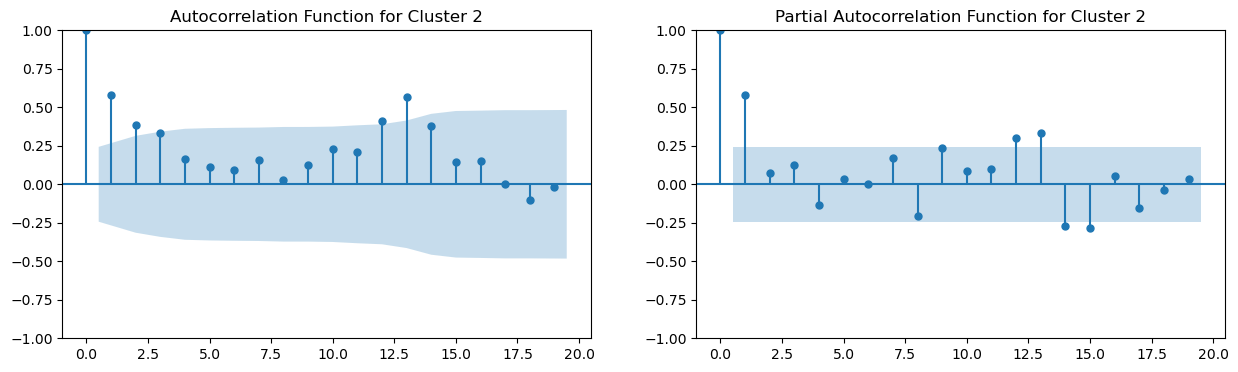

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Function to prepare aggregated time series data for each cluster
def prepare_cluster_data(df, cluster):
    cluster_df = df[df['Cluster'] == cluster].drop(columns='Cluster')
    # Aggregate data by mean along the rows (across all hotels in the cluster)
    aggregated_series = cluster_df.mean(axis=0)
    return aggregated_series

# Iterate over each cluster and generate ACF/PACF plots
for cluster in sorted(df['Cluster'].unique()):
    print(f"Analyzing Cluster {cluster}")
    cluster_ts = prepare_cluster_data(df, cluster)

    # Convert index to a proper time series frequency, assuming one observation per week
    cluster_ts.index = pd.date_range(start='2016-01-01', periods=len(cluster_ts), freq='W')

    # Plot ACF and PACF
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    plot_acf(cluster_ts, ax=axes[0])
    plot_pacf(cluster_ts, ax=axes[1])
    
    axes[0].set_title(f'Autocorrelation Function for Cluster {cluster}')
    axes[1].set_title(f'Partial Autocorrelation Function for Cluster {cluster}')
    
    plt.show()

## Cluster 0

### Test Performance

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

hotel_data = data[(data['Hotel'] == 23)]
true_2020_data = hotel_data.iloc[:, -1]
true_2020_data.index = np.arange(53, 66)  # Resetting index from 53 and after 12 months

hotel_data = hotel_data.iloc[:, :-1]

# Combine sales data from different years for the same weeks for more data points
combined_sales = []
for year in range(2016, 2020):
    year_data = hotel_data[['Week', str(year)]].rename(columns={str(year): 'Sales'})
    year_data['Year'] = year
    combined_sales.append(year_data)
combined_sales = pd.concat(combined_sales).set_index(['Year', 'Week'])

In [21]:
model = SARIMAX(combined_sales['Sales'], order=(1, 0, 0), seasonal_order=(1, 1, 0, 13))
results = model.fit()

forecast_start_index = 53  # start index for forecasting
forecast_end_index = forecast_start_index + 12  # end index for 13 weeks of forecasting

forecast = results.predict(start=forecast_start_index, end=forecast_end_index)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31254D+01    |proj g|=  9.02676D+00

At iterate    5    f=  9.93552D+00    |proj g|=  8.51891D-01

At iterate   10    f=  9.46868D+00    |proj g|=  7.70198D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     21      1     0     0   2.453D-06   9.469D+00
  F =   9.4685688351089912     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/Wayne/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Wayne/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/Wayne/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/Wayne/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Root Mean Square Error (RMSE): 76668.09345746477


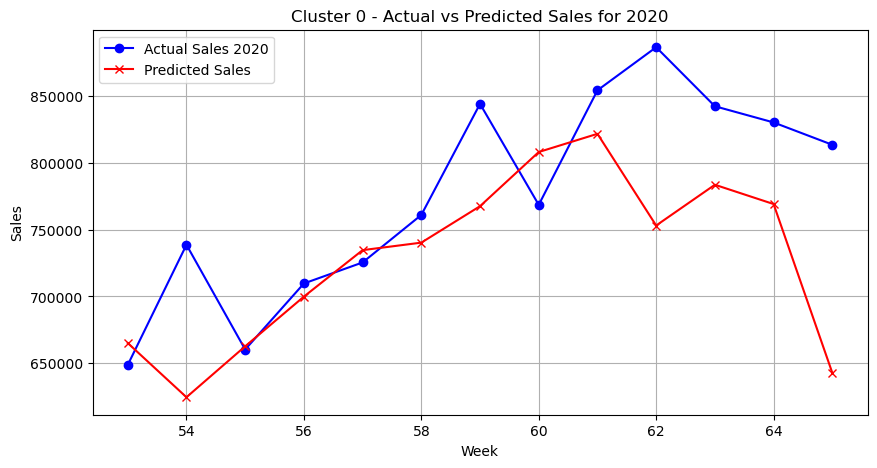

In [22]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(true_2020_data, forecast))
print("Root Mean Square Error (RMSE):", rmse)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(true_2020_data.index, true_2020_data, label='Actual Sales 2020', marker='o', color='blue')
plt.plot(forecast.index, forecast, label='Predicted Sales', marker='x', color='red')
plt.title('Cluster 0 - Actual vs Predicted Sales for 2020')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

### Predict for 2021

In [23]:
hotel_data = data[(data['Hotel'] == 23)]

# Combine sales data from different years for the same weeks for more data points
combined_sales = []
for year in range(2016, 2021):
    year_data = hotel_data[['Week', str(year)]].rename(columns={str(year): 'Sales'})
    year_data['Year'] = year
    combined_sales.append(year_data)
combined_sales = pd.concat(combined_sales).set_index(['Year', 'Week'])

In [24]:
model = SARIMAX(combined_sales['Sales'], order=(1, 0, 0), seasonal_order=(1, 1, 0, 13))
results = model.fit()

forecast_start_index = 66  # start index for forecasting
forecast_end_index = 66 + 12  # end index for 13 weeks of forecasting

forecast = results.predict(start=forecast_start_index, end=forecast_end_index)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18196D+01    |proj g|=  4.76650D+00

At iterate    5    f=  1.03684D+01    |proj g|=  7.55376D-01

At iterate   10    f=  1.00463D+01    |proj g|=  2.22066D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     19      1     0     0   1.393D-04   1.005D+01
  F =   10.046267296013854     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/Wayne/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Wayne/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/Wayne/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/Wayne/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


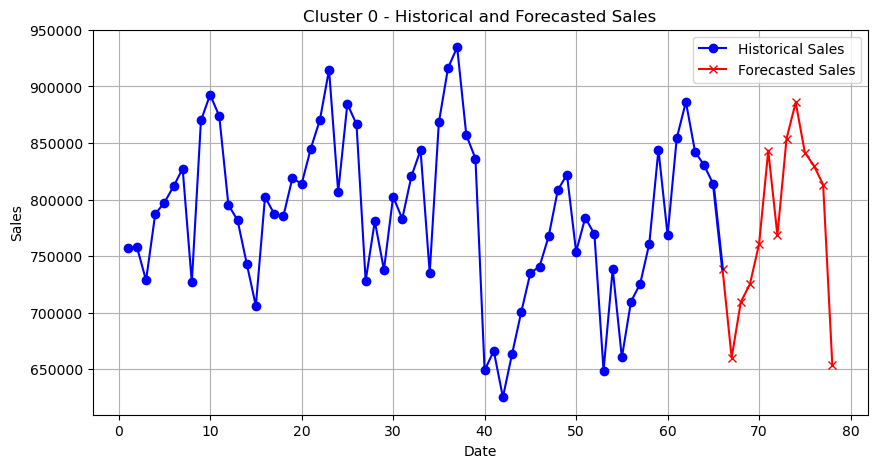

In [25]:
# Plotting the results
historical_sales = combined_sales["Sales"].values
forecasted_sales = forecast.values

historical_dates = [i+1 for i in range(65)]
forecasted_dates = [i+1 for i in range(65, 65 + len(forecasted_sales))]

plt.figure(figsize=(10, 5))
plt.plot(historical_dates, historical_sales, color='blue',marker='o', label='Historical Sales')
plt.plot(forecasted_dates, forecasted_sales, color='red',marker='x', label='Forecasted Sales')

# Ensure there is no gap between the last historical point and the first forecast point
plt.plot([historical_dates[-1], forecasted_dates[0]], [historical_sales[-1], forecasted_sales[0]], color='blue', linestyle='-', linewidth=2)

# Adding labels and legend
plt.title('Cluster 0 - Historical and Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

## Cluster 1

### Test Performance

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

hotel_data = data[(data['Hotel'] == 21)]
true_2020_data = hotel_data.iloc[:, -1]
true_2020_data.index = np.arange(52, 65)  # Resetting index from 53 and after 12 months

hotel_data = hotel_data.iloc[:, :-1]

# Combine sales data from different years for the same weeks for more data points
combined_sales = []
for year in range(2016, 2020):
    year_data = hotel_data[['Week', str(year)]].rename(columns={str(year): 'Sales'})
    year_data['Year'] = year
    combined_sales.append(year_data)
combined_sales = pd.concat(combined_sales).set_index(['Year', 'Week'])

In [27]:
model = SARIMAX(combined_sales['Sales'], order=(1, 0, 1), seasonal_order=(0, 1, 1, 13))
results = model.fit()

forecast_start_index = 52  # start index for forecasting
forecast_end_index = forecast_start_index + 12  # end index for 13 weeks of forecasting

forecast = results.predict(start=forecast_start_index, end=forecast_end_index)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.90524D+00    |proj g|=  1.22649D+00

At iterate    5    f=  9.61510D+00    |proj g|=  1.88652D-03

At iterate   10    f=  9.61499D+00    |proj g|=  4.11315D-02

At iterate   15    f=  9.61244D+00    |proj g|=  1.06301D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     22      1     0     0   8.785D-06   9.612D+00
  F =   9.6123567329283546     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/Wayne/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Wayne/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Wayne/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
/Users/Wayne/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_predictio

Root Mean Square Error (RMSE): 90628.57331993557


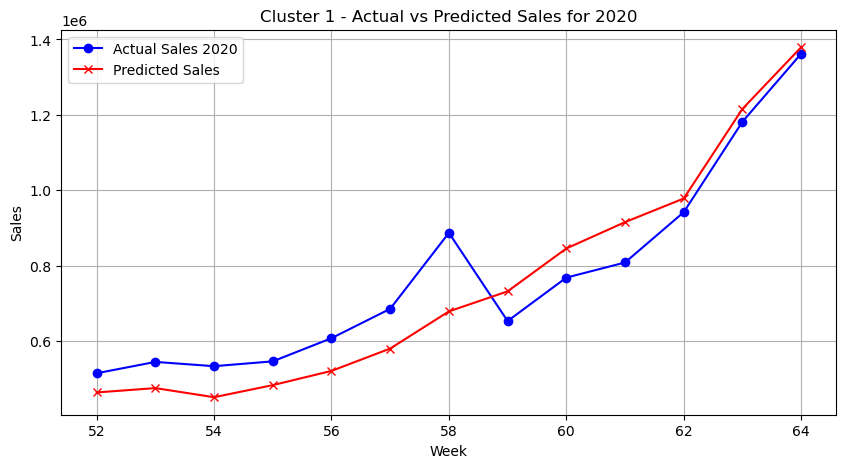

In [28]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(true_2020_data, forecast))
print("Root Mean Square Error (RMSE):", rmse)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(true_2020_data.index, true_2020_data, label='Actual Sales 2020', marker='o', color='blue')
plt.plot(forecast.index, forecast, label='Predicted Sales', marker='x', color='red')
plt.title('Cluster 1 - Actual vs Predicted Sales for 2020')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

### Predict for 2021

In [29]:
hotel_data = data[(data['Hotel'] == 21)]

# Combine sales data from different years for the same weeks for more data points
combined_sales = []
for year in range(2016, 2021):
    year_data = hotel_data[['Week', str(year)]].rename(columns={str(year): 'Sales'})
    year_data['Year'] = year
    combined_sales.append(year_data)
combined_sales = pd.concat(combined_sales).set_index(['Year', 'Week'])

In [30]:
model = SARIMAX(combined_sales['Sales'], order=(1, 0, 1), seasonal_order=(0, 1, 1, 13))
results = model.fit()

forecast_start_index = 66  # start index for forecasting
forecast_end_index = forecast_start_index + 12  # end index for 13 weeks of forecasting

forecast = results.predict(start=forecast_start_index, end=forecast_end_index)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04754D+01    |proj g|=  1.07017D+00

At iterate    5    f=  1.02528D+01    |proj g|=  4.08882D-03

At iterate   10    f=  1.02520D+01    |proj g|=  7.37754D-02

At iterate   15    f=  1.02498D+01    |proj g|=  4.47580D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     19      1     0     0   2.689D-06   1.025D+01
  F =   10.249849162345779     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/Wayne/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Wayne/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Wayne/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.
/Users/Wayne/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/Wayne/anaconda3/lib/python3.11/site-p

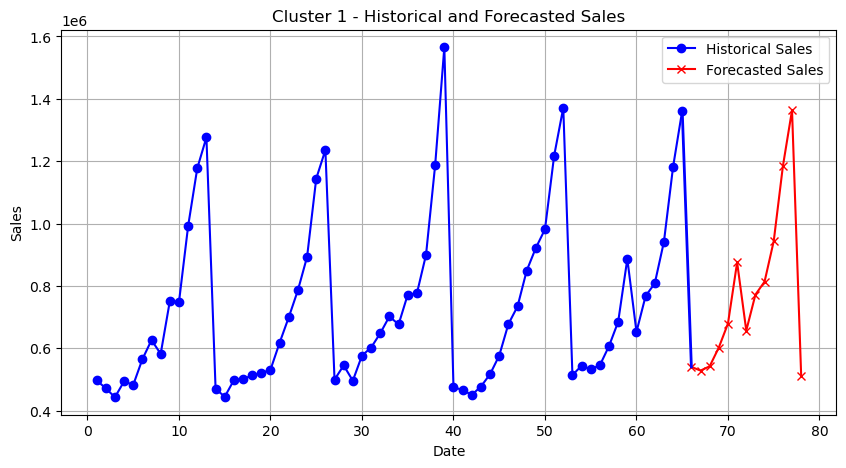

In [31]:
# Plotting the results
historical_sales = combined_sales["Sales"].values
forecasted_sales = forecast.values

historical_dates = [i+1 for i in range(65)]
forecasted_dates = [i+1 for i in range(65, 65 + len(forecasted_sales))]

plt.figure(figsize=(10, 5))
plt.plot(historical_dates, historical_sales, color='blue',marker='o', label='Historical Sales')
plt.plot(forecasted_dates, forecasted_sales, color='red',marker='x', label='Forecasted Sales')

# Ensure there is no gap between the last historical point and the first forecast point
plt.plot([historical_dates[-1], forecasted_dates[0]], [historical_sales[-1], forecasted_sales[0]], color='blue', linestyle='-', linewidth=2)

# Adding labels and legend
plt.title('Cluster 1 - Historical and Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

## Cluster 2

### Test Performance

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

hotel_data = data[(data['Hotel'] == 26)]
true_2020_data = hotel_data.iloc[:, -1]
true_2020_data.index = np.arange(53, 66)  # Resetting index from 53 and after 12 months

hotel_data = hotel_data.iloc[:, :-1]

# Combine sales data from different years for the same weeks for more data points
combined_sales = []
for year in range(2016, 2020):
    year_data = hotel_data[['Week', str(year)]].rename(columns={str(year): 'Sales'})
    year_data['Year'] = year
    combined_sales.append(year_data)
combined_sales = pd.concat(combined_sales).set_index(['Year', 'Week'])

In [33]:
model = SARIMAX(combined_sales['Sales'], order=(1, 0, 1), seasonal_order=(1, 1, 1, 13))
results = model.fit()

forecast_start_index = 53  # start index for forecasting
forecast_end_index = forecast_start_index + 12  # end index for 13 weeks of forecasting

forecast = results.predict(start=forecast_start_index, end=forecast_end_index)

/Users/Wayne/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Wayne/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Wayne/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.14594D+00    |proj g|=  1.63599D+00

At iterate    5    f=  9.10342D+00    |proj g|=  2.61864D-02

At iterate   10    f=  9.08195D+00    |proj g|=  4.74064D-01

At iterate   15    f=  9.00162D+00    |proj g|=  5.63861D-02

At iterate   20    f=  8.99531D+00    |proj g|=  1.67545D-02

At iterate   25    f=  8.99309D+00    |proj g|=  2.53584D-02

At iterate   30    f=  8.99185D+00    |proj g|=  3.73132D-03

At iterate   35    f=  8.99162D+00    |proj g|=  6.46900D-03

At iterate   40    f=  8.99150D+00    |proj g|=  2.54452D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/Wayne/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/Wayne/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Root Mean Square Error (RMSE): 67722.93464124319


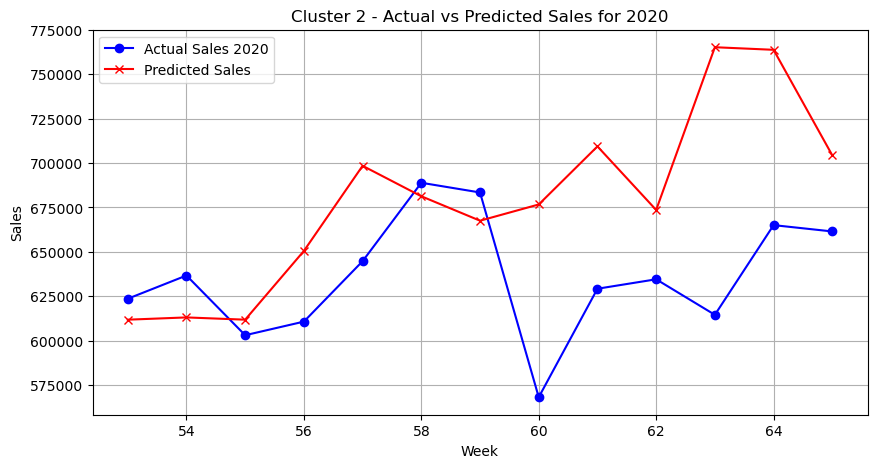

In [34]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(true_2020_data, forecast))
print("Root Mean Square Error (RMSE):", rmse)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(true_2020_data.index, true_2020_data, label='Actual Sales 2020', marker='o', color='blue')
plt.plot(forecast.index, forecast, label='Predicted Sales', marker='x', color='red')
plt.title('Cluster 2 - Actual vs Predicted Sales for 2020')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

### Predict for 2021

In [35]:
hotel_data = data[(data['Hotel'] == 26)]

# Combine sales data from different years for the same weeks for more data points
combined_sales = []
for year in range(2016, 2021):
    year_data = hotel_data[['Week', str(year)]].rename(columns={str(year): 'Sales'})
    year_data['Year'] = year
    combined_sales.append(year_data)
combined_sales = pd.concat(combined_sales).set_index(['Year', 'Week'])

In [36]:
model = SARIMAX(combined_sales['Sales'], order=(1, 0, 1), seasonal_order=(1, 1, 1, 13))
results = model.fit()

forecast_start_index = 66  # start index for forecasting
forecast_end_index = forecast_start_index + 12  # end index for 13 weeks of forecasting

forecast = results.predict(start=forecast_start_index, end=forecast_end_index)

/Users/Wayne/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Wayne/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Wayne/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17739D+01    |proj g|=  1.11413D+01


 This problem is unconstrained.



At iterate    5    f=  9.70340D+00    |proj g|=  1.50545D-01

At iterate   10    f=  9.69923D+00    |proj g|=  1.26434D-02

At iterate   15    f=  9.69220D+00    |proj g|=  3.49243D-01

At iterate   20    f=  9.63242D+00    |proj g|=  4.24447D-02

At iterate   25    f=  9.61646D+00    |proj g|=  2.62480D-01

At iterate   30    f=  9.61283D+00    |proj g|=  7.93661D-03

At iterate   35    f=  9.61274D+00    |proj g|=  1.27787D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     52      1     0     0   1.278D-04   9.613D+00
  F =   9.6127434083185506     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Users/Wayne/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/Wayne/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


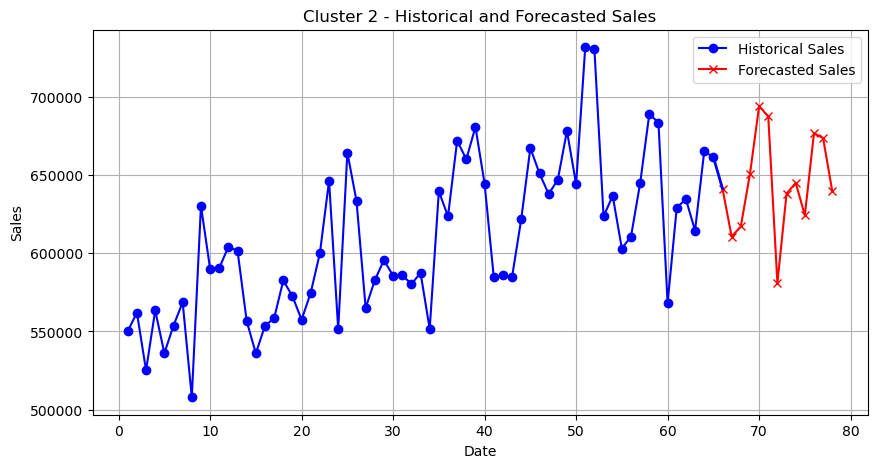

In [37]:
# Plotting the results
historical_sales = combined_sales["Sales"].values
forecasted_sales = forecast.values

historical_dates = [i+1 for i in range(65)]
forecasted_dates = [i+1 for i in range(65, 65 + len(forecasted_sales))]

plt.figure(figsize=(10, 5))
plt.plot(historical_dates, historical_sales, color='blue',marker='o', label='Historical Sales')
plt.plot(forecasted_dates, forecasted_sales, color='red',marker='x', label='Forecasted Sales')

# Ensure there is no gap between the last historical point and the first forecast point
plt.plot([historical_dates[-1], forecasted_dates[0]], [historical_sales[-1], forecasted_sales[0]], color='blue', linestyle='-', linewidth=2)

# Adding labels and legend
plt.title('Cluster 2 - Historical and Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Show plot
plt.show()